## Imports

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


## CONSTANT
__Constants__, as it speaks for itself, are used as constant value tensors.


In [2]:
# create graph
a = tf.constant(2)
b = tf.constant(3)
c = a+b
# launch the graph in a session
with tf.Session() as sess:
	print(sess.run(c))

5


To change the value we need to use variables or placeholders.


## VARIABLE
Variables are tensors that we can change their value.

BUT, what is the difference in execution then?


Variables needs to be __initialized__. The first argument that we pass to the `tf.Variable()` function is the initil value.
We have to invoke a __variable initializer operation__ and run the operation on the session.





In [3]:
# create graph
a = tf.Variable(2)
b = tf.Variable(3)
c = a+b
# add an Op to initialize global variables
init_op = tf.global_variables_initializer()

# launch the graph in a session
with tf.Session() as sess:
    # run the variable initializer
    sess.run(init_op)
    # now we can run our operations
    print(sess.run(c))

5


Variables are usually used for weights and biases.

__weights__ are usually initialized from a normal distribution using `tf.random_normal()` or `tf.truncated_normal()`.

__biases__ are usually initialized from zeros using `tf.zeros()` or `tf.zeros_like()`.




In [4]:
# create graph
weights = tf.Variable(tf.truncated_normal(shape=[2,3], stddev=0.01))
biases = tf.Variable(tf.zeros([3]))

# add an Op to initialize global variables
init_op = tf.global_variables_initializer()

# launch the graph in a session
with tf.Session() as sess:
    # run the variable initializer
    sess.run(init_op)
    # now we can run our operations
    W, b = sess.run([weights, biases])
    print('weights = ', W)
    print('biases = ', b)

weights =  [[ 0.00182071  0.00041931 -0.01424191]
 [-0.00859324 -0.00087234  0.00598787]]
biases =  [ 0.  0.  0.]


You might sometimes see that the variables are created with `tf.get_variable()` instead of `tf.Variable()`. The reason of using these two functions interchangebly relies on creating _name scopes_ and _variable scopes_. It is thoroughly explained in our [tensorboard tutorial]().

In [5]:
# create graph
weights = tf.get_variable(name="W", shape=[2,3], initializer=tf.truncated_normal_initializer(stddev=0.01))
biases = tf.get_variable(name="b", shape=[3], initializer=tf.zeros_initializer())

# add an Op to initialize global variables
init_op = tf.global_variables_initializer()

# launch the graph in a session
with tf.Session() as sess:
    # run the variable initializer
    sess.run(init_op)
    # now we can run our operations
    W, b = sess.run([weights, biases])
    print('weights = ', W)
    print('biases = ', b)

weights =  [[ 0.00664345  0.01734095  0.00589535]
 [-0.00727181  0.00308348 -0.00800745]]
biases =  [ 0.  0.  0.]


## PLACEHOLDER:
Placeholders are tensors that are placed to hold the data.
We can build our graph without needing the data (because data is huge).
In the time of need, we can feed the data in the right place (guess what place ?!!)

BUT, Placeholders are just holding the place... where should we feed the input?

In a dictionaty called __feed_dict__.





In [6]:
# create graph
# create a placeholder of type float 32-bit, value is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, value is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
c = a+b

# launch the graph in a session
with tf.Session() as sess:
    # create a feed_dict:
    feed_dict={a: [1, 2, 3]}
    # feed it to placeholder a via the dict 
    print(sess.run(c, feed_dict=feed_dict)) 

[ 6.  7.  8.]


## Exercise:
Now let's run a cool example. We will load an image and slice a part of the image and visualize it.

We will load an image and try to slice it using the _slice_ method in tensorflow. Complete the code to run the session.
Complete the code and 


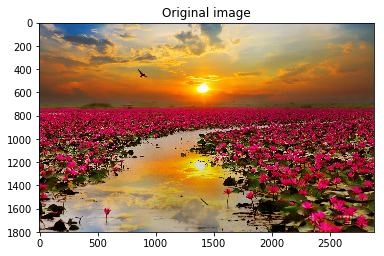

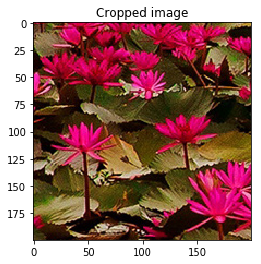

In [8]:
# load the image
filename = 'flowers.jpg'
raw_image_data = mpimg.imread(filename)

# create a placeholder for the image
image = tf.placeholder(dtype="uint8", shape=[None, None, 3])
# slice the image 
slice = tf.slice(image, begin=[1000, 0, 0], size=[200, 200, -1])

# launch the graph in a session
result = []
with tf.Session() as session:
    ######################## YOUR CODE HERE ##########################
    # Hint: You should run the session and pass the op that you want # 
    # and the feed_dict and store the value in "result" variable.    #
    #                                                                #
    result = session.run(slice, feed_dict={image: raw_image_data})
    #                                                                #    
    ##################################################################


    result = session.run(slice, feed_dict={image: raw_image_data})

plt.imshow(raw_image_data)
plt.title('Original image')
plt.show()

plt.imshow(result)
plt.title('Cropped image')
plt.show()